In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

/Users/carina/anaconda/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [122]:
#load file
data = pd.read_csv('saturation_extent.txt', sep='\s+', header=None, names=["time", "sat_value"])
data.shape
#data.head # what the data looks like


(72562, 2)

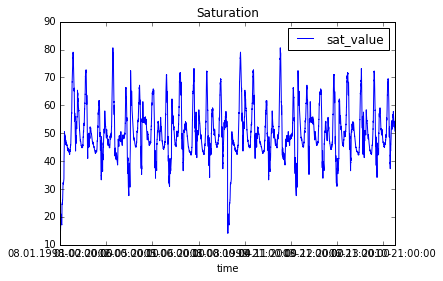

In [123]:
#plot data
%matplotlib inline
data.plot(x = 'time', y = 'sat_value')
#plt.plot("time", "sat_value")
plt.title('Saturation')
plt.show()

<bound method NDFrame.head of                      time  sat_value
0     1998-01-08 00:00:00    20.0247
1     1998-01-08 03:00:00    18.6619
2     1998-01-08 06:00:00    18.3381
3     1998-01-08 09:00:00    18.1597
4     1998-01-08 12:00:00    18.0215
5     1998-01-08 15:00:00    17.9372
6     1998-01-08 18:00:00    17.8560
7     1998-01-08 21:00:00    17.8066
8     1998-02-08 00:00:00    17.7491
9     1998-02-08 03:00:00    17.6969
10    1998-02-08 06:00:00    17.6553
11    1998-02-08 09:00:00    17.6190
12    1998-02-08 12:00:00    17.5883
13    1998-02-08 15:00:00    17.5609
14    1998-02-08 18:00:00    17.5411
15    1998-02-08 21:00:00    17.5361
16    1998-03-08 00:00:00    17.5464
17    1998-03-08 03:00:00    17.5601
18    1998-03-08 06:00:00    17.5869
19    1998-03-08 09:00:00    17.5994
20    1998-03-08 12:00:00    17.6187
21    1998-03-08 15:00:00    17.6441
22    1998-03-08 18:00:00    17.6938
23    1998-03-08 21:00:00    17.7541
24    1998-04-08 00:00:00    17.8175
25    19

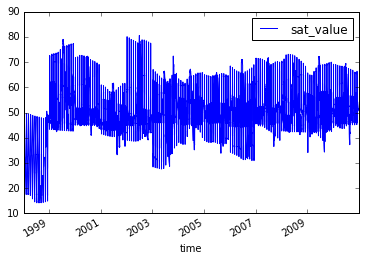

In [126]:
#type(data.time[2])
# time is string, convert to datetime format
data.time = data.time.apply(pd.to_datetime, dayfirst=True)
data.plot(x = 'time', y = 'sat_value')
data.head

In [170]:
ds = data.to_xarray()
test = ds.groupby('time.month').max()
type(test)

xarray.core.dataset.Dataset

<xarray.DataArray 'time' (month: 12)>
array(['2010-01-31T21:00:00.000000000', '2010-02-28T21:00:00.000000000',
       '2010-03-31T21:00:00.000000000', '2010-04-30T21:00:00.000000000',
       '2010-05-31T21:00:00.000000000', '2010-06-30T21:00:00.000000000',
       '2010-07-31T21:00:00.000000000', '2010-08-31T21:00:00.000000000',
       '2010-09-30T21:00:00.000000000', '2010-10-31T21:00:00.000000000',
       '2010-11-30T21:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

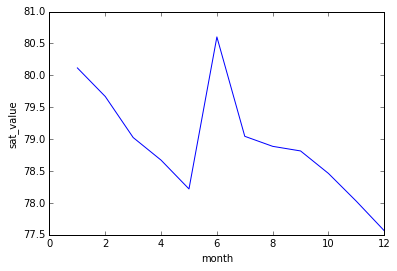

In [171]:
T = test['time']
S = test['sat_value']
type(T)
S.plot()
S.size
T

In [164]:
df = test.to_dataframe()

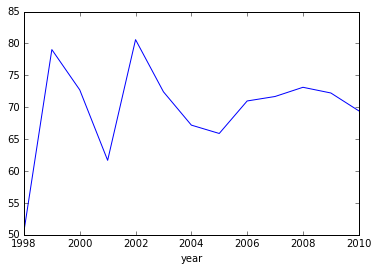

In [168]:
df.head()
df.sat_value.plot()